# Assignment 2

### Sixue Liu

Due Wednesday, Jan. 16 at 11:30 AM

1. Numerical differentiation exercises

Problem 1

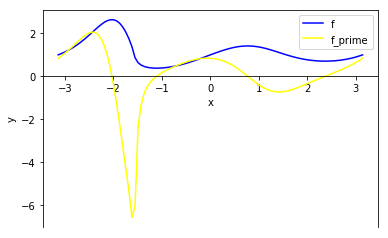

In [24]:
import sympy as sy
import numpy as np
import math
from matplotlib import pyplot as plt

def func(x):
    return (sy.sin(x) + 1) ** sy.sin(sy.cos(x))


x = sy.symbols('x')
z = sy.lambdify(x, func(x).diff(x), 'numpy')
#print(z(np.linspace(-math.pi, math.pi, 20)))

x = np.linspace(-math.pi, math.pi, 100)
y = z(x)

plt.figure()
plt.plot(x,(np.sin(x) + 1) ** np.sin(np.cos(x)),color='blue',label = "f")
plt.plot(x,z(x),color='yellow',label = "f_prime")
ax = plt.gca()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
ax.spines["bottom"].set_position("zero")
plt.show()

Problem 2

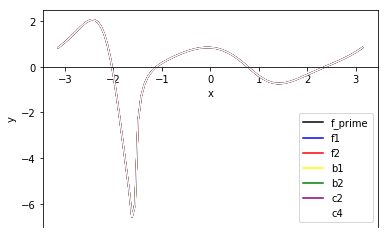

In [32]:
f = lambda x: (np.sin(x) + 1) ** np.sin(np.cos(x))

def forward1(f, x, h):
    return (f(x + h) - f(x))/ h

def forward2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h) 

def backward1(f, x, h):
    return (f(x) - f(x - h)) / h

def backward2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h) 

def centered2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def centered4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)
    
x = np.linspace(-math.pi, math.pi, 100)
h = 0.001
#print(forward1(f,x,h))


plt.figure()
# plt.plot(x,y,color = 'red', label = "f'")
plt.plot(x, z(x), color='black',label = "f_prime")
plt.plot(x, forward1(f,x,h) ,color='blue',label = "f1")
plt.plot(x, forward2(f,x,h) ,color='red',label = "f2")
plt.plot(x, backward1(f,x,h) ,color='yellow',label = "b1")
plt.plot(x, backward2(f,x,h) ,color='green',label = "b2")
plt.plot(x, centered2(f,x,h) ,color='purple',label = "c2")
plt.plot(x, centered4(f,x,h) ,color='white',label = "c4")
ax = plt.gca()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
ax.spines["bottom"].set_position("zero")
plt.show()

Problem 3 

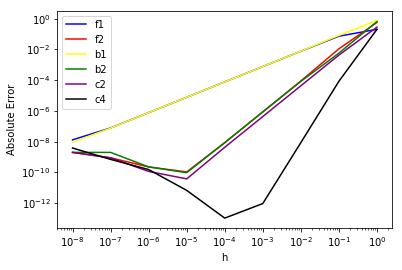

In [34]:
h_delta = np.logspace(-8, 0, 9)

def convergence(x):
    x0 = z(x)
    h_delta = np.logspace(-8, 0, 9)
    plt.plot(h_delta, abs([forward1(f, x, h = i) for i in h_delta] - x0), color='blue',label = "f1")
    plt.plot(h_delta, abs([forward2(f, x, h = i) for i in h_delta] - x0), color='red',label = "f2")
    plt.plot(h_delta, abs([backward1(f, x, h = i) for i in h_delta] - x0), color='yellow',label = "b1")
    plt.plot(h_delta, abs([backward2(f, x, h = i) for i in h_delta] - x0), color='green',label = "b2")
    plt.plot(h_delta, abs([centered2(f, x, h = i) for i in h_delta] - x0), color='purple',label = "c2")
    plt.plot(h_delta, abs([centered4(f, x, h = i) for i in h_delta] - x0), color='black',label = "c4")
    #ax = plt.gca()
    plt.legend(loc = 'upper left')
    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    #ax.spines["bottom"].set_position("zero")
    plt.loglog()
    plt.show()

convergence(1)

Problem 4 

In [5]:
import numpy as np 
import pandas as pd 

df = np.load("plane.npy")
radar = pd.DataFrame(df, columns = ['t', 'alpha', 'beta'])
radar

,t,alpha,beta
0,7.0,56.25,67.54
1,8.0,55.53,66.57
2,9.0,54.80,65.59
3,10.0,54.06,64.59
4,11.0,53.34,63.62
5,12.0,52.69,62.74
6,13.0,51.94,61.72
7,14.0,51.28,60.82


In [6]:
radar['alpha'] = np.deg2rad(radar['alpha'])
radar['beta'] = np.deg2rad(radar['beta'])

a = 500
radar['x(t)'] = a * np.tan(radar['beta']) / (np.tan(radar['beta']) - np.tan(radar['alpha']))
radar['y(t)'] = a * np.tan(radar['beta']) *  np.tan(radar['alpha']) / (np.tan(radar['beta']) - np.tan(radar['alpha']))

In [7]:
radar['x(t)_prime'] = 0
radar['y(t)_prime'] = 0

In [8]:
radar

,t,alpha,beta,x(t),y(t),x(t)_prime,y(t)_prime
0,7.0,0.981748,1.178795,1311.271337,1962.456239,0,0
1,8.0,0.969181,1.161866,1355.936476,1975.114505,0,0
2,9.0,0.956440,1.144761,1401.918398,1987.346016,0,0
3,10.0,0.943525,1.127308,1450.497006,2000.840713,0,0
4,11.0,0.930959,1.110378,1498.640350,2013.512411,0,0
5,12.0,0.919614,1.095020,1543.798955,2025.792234,0,0
6,13.0,0.906524,1.077217,1598.041382,2040.990583,0,0
7,14.0,0.895005,1.061509,1647.596093,2055.065571,0,0


In [9]:
radar['x(t)_prime'][0] = (radar['x(t)'][1] - radar['x(t)'][0]) / (8 - 7)
radar['x(t)_prime'][7] = (radar['x(t)'][7] - radar['x(t)'][6]) / (14 - 13)
radar['y(t)_prime'][0] = (radar['y(t)'][1] - radar['y(t)'][0]) / (8 - 7)
radar['y(t)_prime'][7] = (radar['y(t)'][7] - radar['y(t)'][6]) / (14 - 13)

for i in range(1, 7):
    radar['x(t)_prime'][i] = (radar['x(t)'][i + 1] - radar['x(t)'][i - 1]) / 2
    radar['y(t)_prime'][i] = (radar['y(t)'][i + 1] - radar['y(t)'][i - 1]) / 2

C:\persp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\persp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\persp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\persp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopy

In [10]:
radar

,t,alpha,beta,x(t),y(t),x(t)_prime,y(t)_prime
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14


In [11]:
radar['speed'] = np.sqrt(radar['x(t)_prime'] ** 2 + radar['y(t)_prime'] ** 2).round(2)

In [12]:
radar

,t,alpha,beta,x(t),y(t),x(t)_prime,y(t)_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12,45.61
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12,46.57
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12,48.51
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13,49.73
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12,47.54
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13,50.70
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14,52.89
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14,50.96


Problem 5 

In [67]:
def Jacobian(v_str, f_list):
    vars = sy.symbols(v_str)
    f = sy.sympify(f_list)
    J = sy.zeros(len(f),len(vars))
    
    for i, fi in enumerate(f):
        print(i, fi)
        for j, s in enumerate(vars):
            print(j, s)
            fi = sy.lambdify((u1,u2), fi, 'numpy')
            #J[i,j] = sy.diff(fi, s)
            J[i, j] =  (fi(u1 + 0.01 , u2 + 0.01 * i) - fi(u1 - 0.01, u2 - 0.01 * i)) / (2 * 0.01)
    return J

In [68]:
u1 = sy.symbols('u1')
u2 = sy.symbols('u2')
Jacobian('u1 u2', ['u1 ** 2','u1 ** 3 - u2'])

0 u1**2
0 u1
1 u2


SyntaxError: invalid syntax (<string>, line 1)